## Decision Tree for Regression

The process of solving regression problem with decision tree using Scikit Learn is very similar to that of classification. However for regression we use DecisionTreeRegressor class of the tree library

In [1]:
path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/petrol_consumption.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv(path)

In [4]:
dataset

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


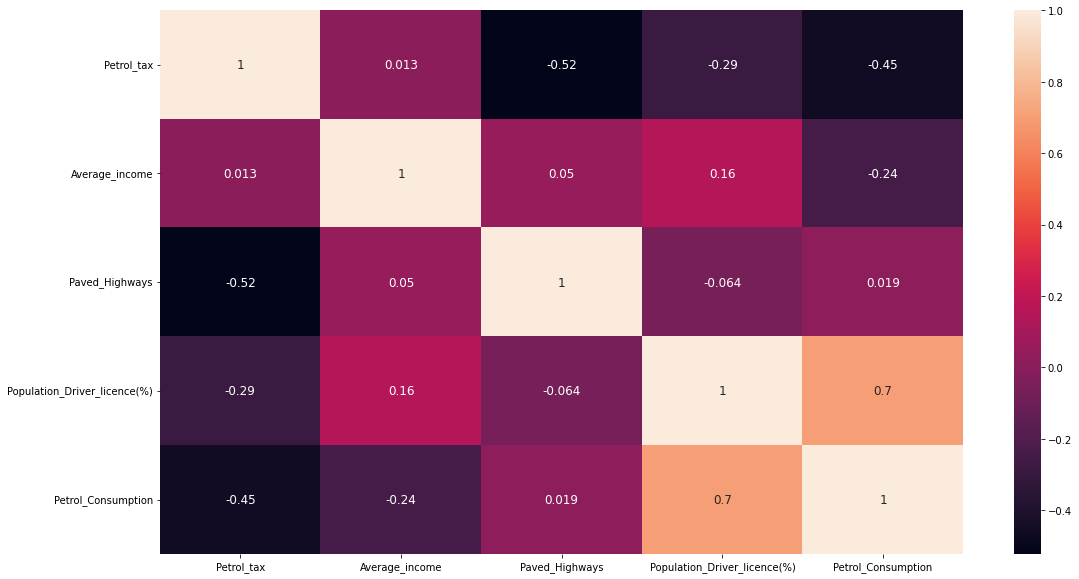

In [7]:
corrmat = dataset.corr()
plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

### Regression

In [8]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
regressor.feature_importances_

array([0.11680541, 0.28433243, 0.05873607, 0.54012609])

In [11]:
type(y_test)

pandas.core.series.Series

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df=pd.DataFrame({'reale':y_test, 'predetto':y_pred})
df

,reale,predetto
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,554.0
37,704,554.0
34,487,628.0
40,587,524.0
7,467,414.0
10,580,510.0


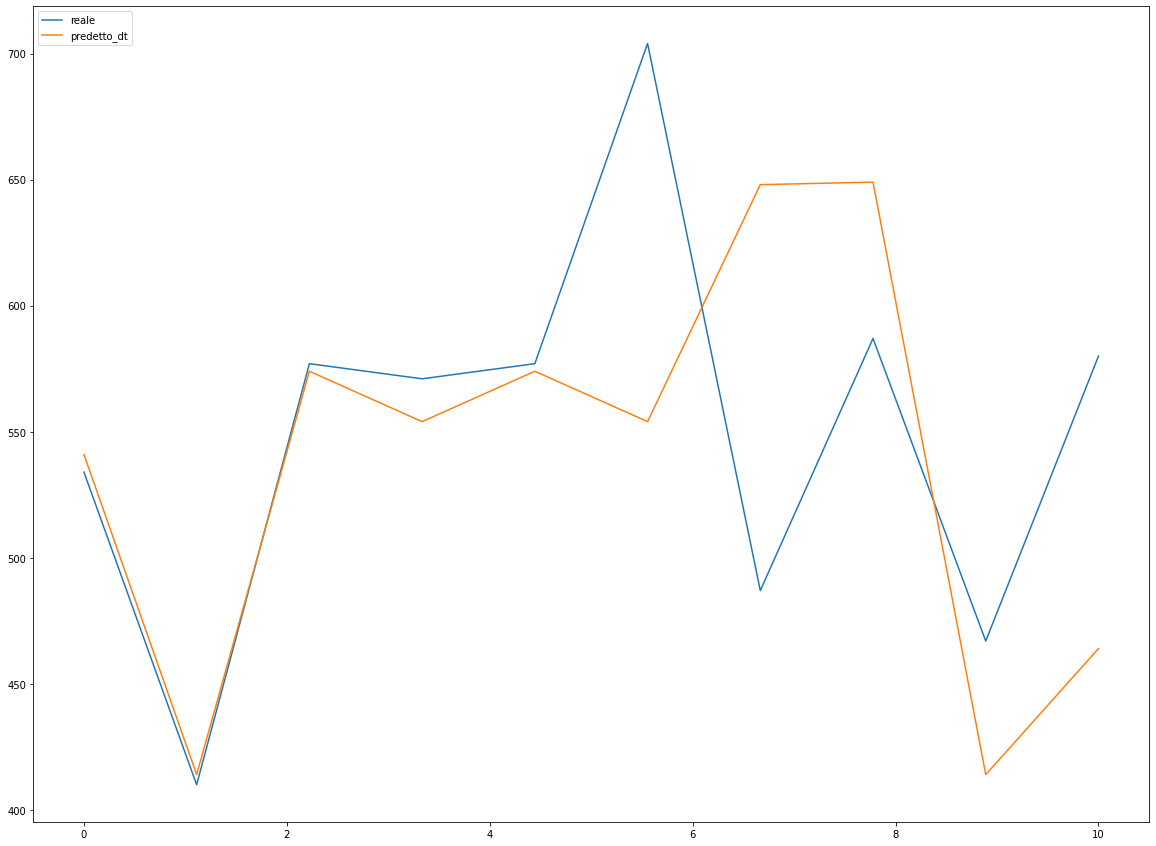

In [ ]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='reale')
plt.plot(x, y_pred, label='predetto_dt')
plt.legend(loc=2);

### Evaluating the Algorithm
To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. 

In [21]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 53.7
Mean Squared Error (MSE): 5507.1
Root Mean Squared Error (RMSE): 74.20983762278422
r2 score: 0.06013202626872194


## With Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [16]:
y_pred2 = regressor.predict(X_test)

In [17]:
df=pd.DataFrame({'reale':y_test, 'predetto_lr':y_pred2})
df

,reale,predetto_lr
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


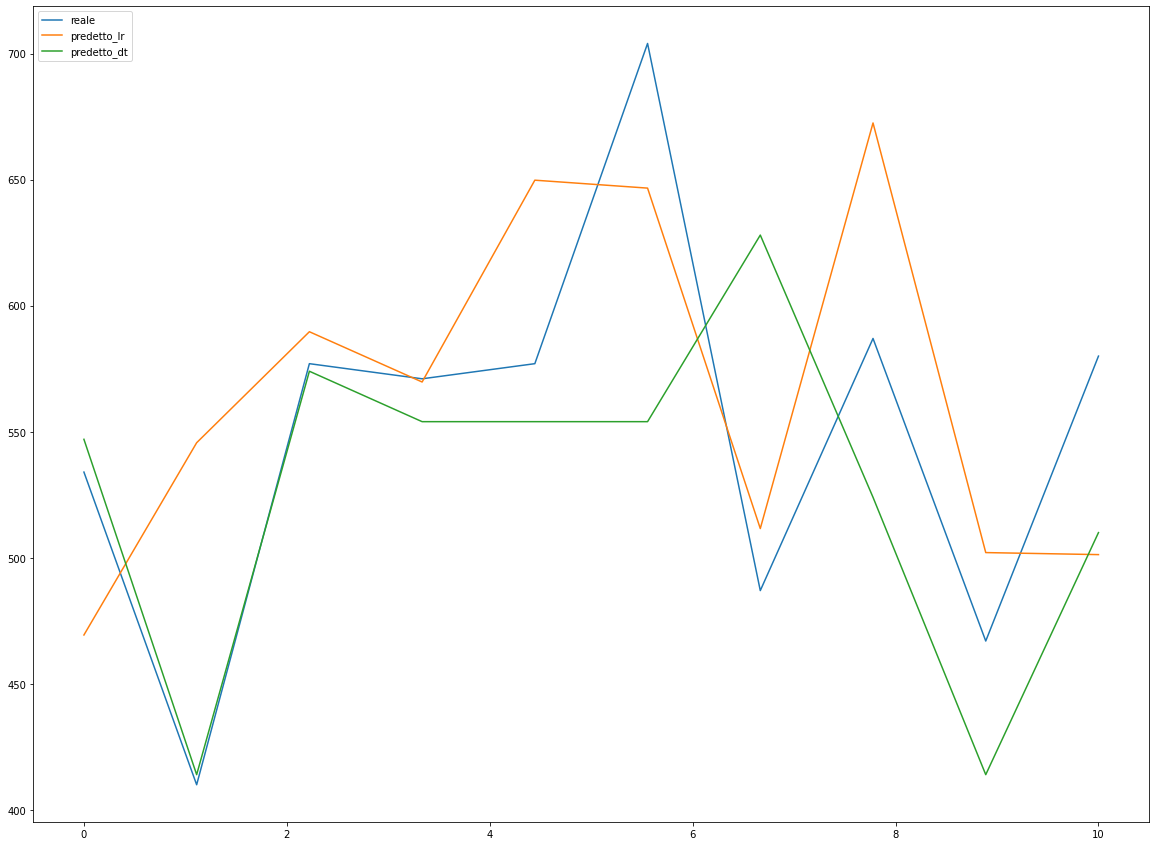

In [18]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='reale')
plt.plot(x, y_pred2, label='predetto_lr')
plt.plot(x, y_pred, label='predetto_dt')
plt.legend(loc=2);

In [20]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('r2 score:',metrics.r2_score(y_test, y_pred2))

Mean Absolute Error (MAE): 56.8222474789647
Mean Squared Error (MSE): 4666.344787588362
Root Mean Squared Error (RMSE): 68.31064915215168
r2 score: 0.20361932410121752


In [ ]:
## decison tree
Mean Absolute Error (MAE): 53.7
Mean Squared Error (MSE): 5507.1
Root Mean Squared Error (RMSE): 74.20983762278422